In [69]:
# Based on spotify hits list we would like to check which factors make a music track became a hit 
# Also We will check if we can predict track will be a hit based on provided features.


# First import are neccesery liberies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


#it's good idea to set bigger plot size at a beging
sns.set(rc = {'figure.figsize':(23,8)})


In [70]:
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [71]:
# First We need to check if there is any missing values
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [72]:
# Have a broader look on data 

df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [22]:
# Let's have a look on the most popular artist and music genre
df['artist'].value_counts().head(20)

Rihanna              25
Drake                23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Kanye West           17
Chris Brown          17
Beyoncé              16
Taylor Swift         16
Katy Perry           16
P!nk                 15
Black Eyed Peas      14
Ariana Grande        14
Coldplay             13
Jason Derulo         13
Maroon 5             13
JAY-Z                12
Justin Timberlake    12
Bruno Mars           12
Name: artist, dtype: int64

In [99]:
df_artist = df['artist'].value_counts().reset_index()
df_artist.rename(columns={'index':'artist','artist':'number_of_hits'},inplace=True)

df_artist

,artist,number_of_hits
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
...,...,...
830,Grouplove,1
831,Kungs,1
832,Orson,1
833,Labrinth,1


In [100]:
# We are checking how many artist make just one hit
df_artist[(df_artist['number_of_hits']==1)].sum()

artist            EamonDEVDuffyWill SmithLMCAyo & TeoJ BalvinE-4...
number_of_hits                                                  494
dtype: object

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


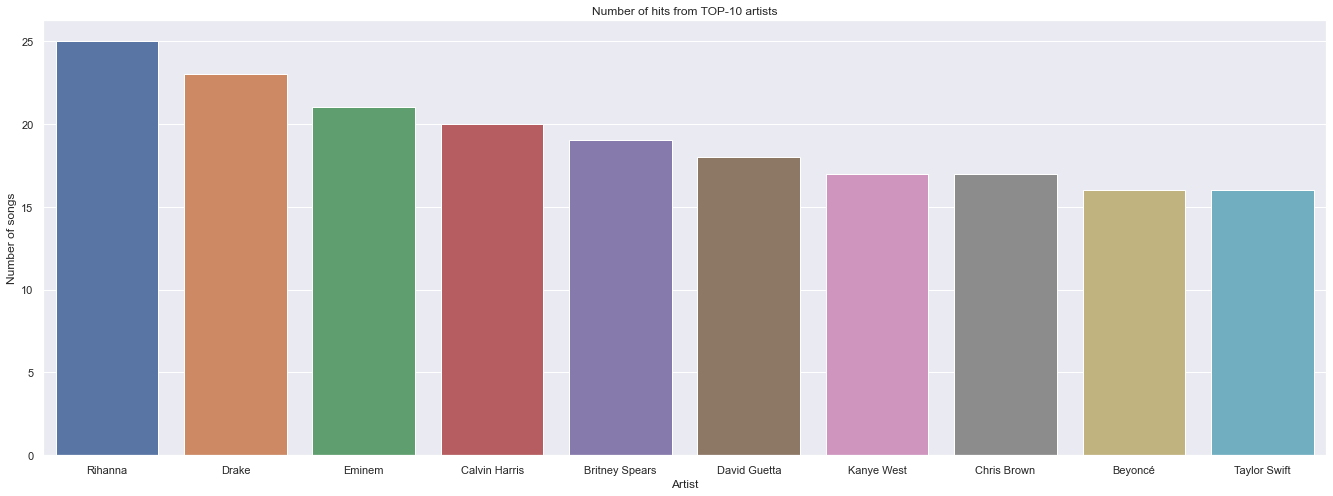

In [101]:
# Let's check Top 10 artist on a barplot

df_artist = df_artist.head(10)
sns.barplot(df_artist['artist'],df_artist['number_of_hits'])
plt.title("Number of hits from TOP-10 artists")
plt.xlabel("Artist")
plt.ylabel("Number of songs")

plt.show()

In [102]:
# Now let's have a look on genre of our hits
df['genre'].value_counts().head(20)

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
rock, metal                        38
pop, latin                         28
pop, rock                          26
set()                              22
hip hop, Dance/Electronic          16
latin                              15
pop, rock, metal                   14
hip hop, pop, latin                14
pop, rock, Dance/Electronic        13
R&B                                13
Name: genre, dtype: int64

In [ ]:
# As We can see there is a lot of songs with more than one genre. It would be good idea to split this
# First We need to find out what is a maximum number of genres per song. 

len(df['genre'].str.findall(',').max())

In [103]:
# So if there is maximum 3 comas than there is maximum 4 genres per song.
genres_title_column =['genre_1','genre_2','genre_3','genre_4']
df[genres_title_column] = df['genre'].str.split(', ',expand=True)

In [104]:
# We can also add number of spicified genres as another feature

df['number_of_genre'] = df['genre'].apply(lambda x: x.count(',')+1)

In [105]:
# Now we will add each genre of music as a feature. 
# If the song is of a particular genre then we insert 1, if not then we insert 0
# First We need to make a list of unique genres from list
genres_lists =[]
unique_genres = []

for x in genres_title_column:
    genres_lists.append(df[x].unique().tolist())
    
for x in genres_lists:
    for y in x:
        if y not in unique_genres:
            unique_genres.append(y)
unique_genres

['pop',
 'rock',
 'hip hop',
 'Dance/Electronic',
 'metal',
 'R&B',
 'Folk/Acoustic',
 'set()',
 'World/Traditional',
 'latin',
 'country',
 'easy listening',
 None,
 'blues',
 'classical',
 'jazz']

In [106]:
# There is two odd values on this list, without any doubt We can remove None
# Let's also have a closer look on 'set()'
unique_genres.remove(None)

df[df['genre']=='set()'].head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Folk/Acoustic,World/Traditional,latin,country,easy listening,blues,classical,jazz,unique_genres,number_of_genre
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,...,0,0,0,0,0,0,0,0,0,1
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,...,0,0,0,0,0,0,0,0,0,1
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,...,0,0,0,0,0,0,0,0,0,1
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,...,0,0,0,0,0,0,0,0,0,1
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# It looks like We can also remove 'set()'
# Now We can assign 0 and 1.

unique_genres.remove('set()')

df[unique_genres] = 0
for x in genre_list:
    for y in unique_genres:
        df.loc[(df[x] == y),y] = 1 

In [46]:
unique_genres.remove(None)


In [47]:
df[df['genre']=='set()'].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,genre,duration_m_s,genre_1,genre_2,genre_3,genre_4,number_of_genre
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,...,0.1740,0.633,94.661,set(),4.1,set(),None,None,None,1
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,...,0.0924,0.868,184.819,set(),3.33,set(),None,None,None,1
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,...,0.3250,0.502,144.188,set(),3.8,set(),None,None,None,1
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,...,0.1170,0.880,128.429,set(),4.25,set(),None,None,None,1
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,...,0.2870,0.802,131.012,set(),3.42,set(),None,None,None,1


In [87]:
#unique_genres.remove('set()')

df[unique_genres] = 0
for x in genre_list:
    for y in unique_genres:
        df.loc[(df[x] == y),y] = 1 

In [88]:
df[unique_genres].sum().sort_values(ascending=False)

pop                  1633
hip hop               778
R&B                   452
Dance/Electronic      390
rock                  234
metal                  66
latin                  64
country                21
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
dtype: int64

In [96]:
df_genre = df[unique_genres].sum().sort_values(ascending=False).reset_index()
df_genre.rename(columns={'index':'genre','0':'number_of_hits'},inplace=True)
df_genre['number_of_hits'] =df_genre[0]
df_genre.drop(df_genre.columns[1],axis =1,inplace=True)
df_genre

,genre,number_of_hits
0,pop,1633
1,hip hop,778
2,R&B,452
3,Dance/Electronic,390
4,rock,234
5,metal,66
6,latin,64
7,country,21
8,Folk/Acoustic,20
9,World/Traditional,10


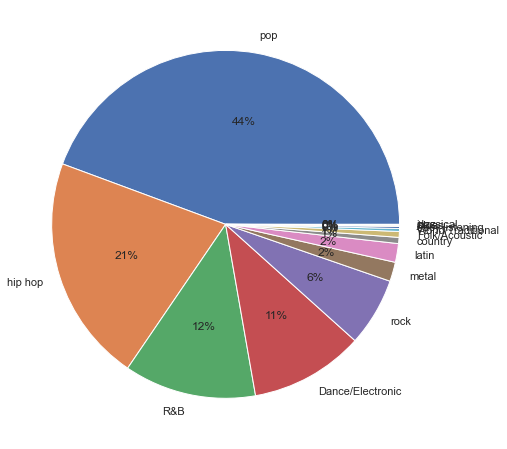

In [97]:
plt.pie(df_genre['number_of_hits'], labels=df_genre['genre'], autopct='%.0f%%')
  
plt.show()

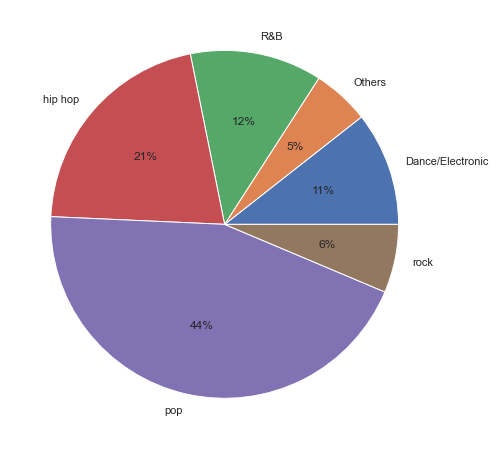

In [98]:
# Chart looks unreadable. Let's assign genres that have less than 100 hits a value'other'. This should improve readability

df_genre.loc[df_genre['number_of_hits']<100,'genre']='Others'
df_genre = df_genre.groupby(['genre'])['number_of_hits'].sum()

plt.pie(df_genre.values, labels=df_genre.index, autopct='%.0f%%')
  
plt.show()

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


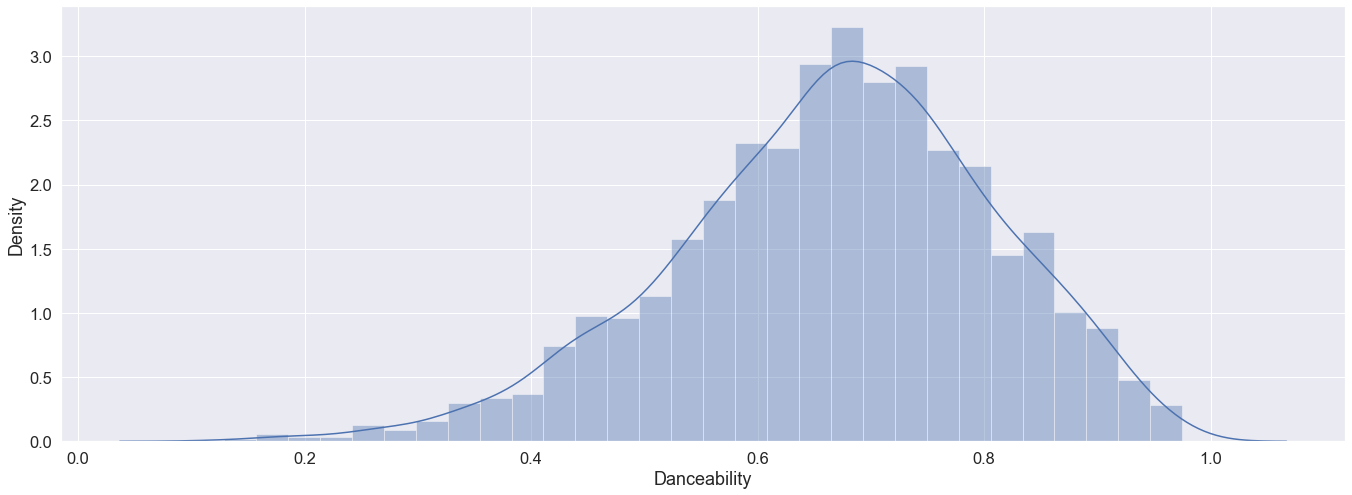

In [67]:
#Let's have a look on distrubution of some numerical factors

sns.distplot(df['danceability'])
plt.xlabel("Danceability")
plt.show()

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


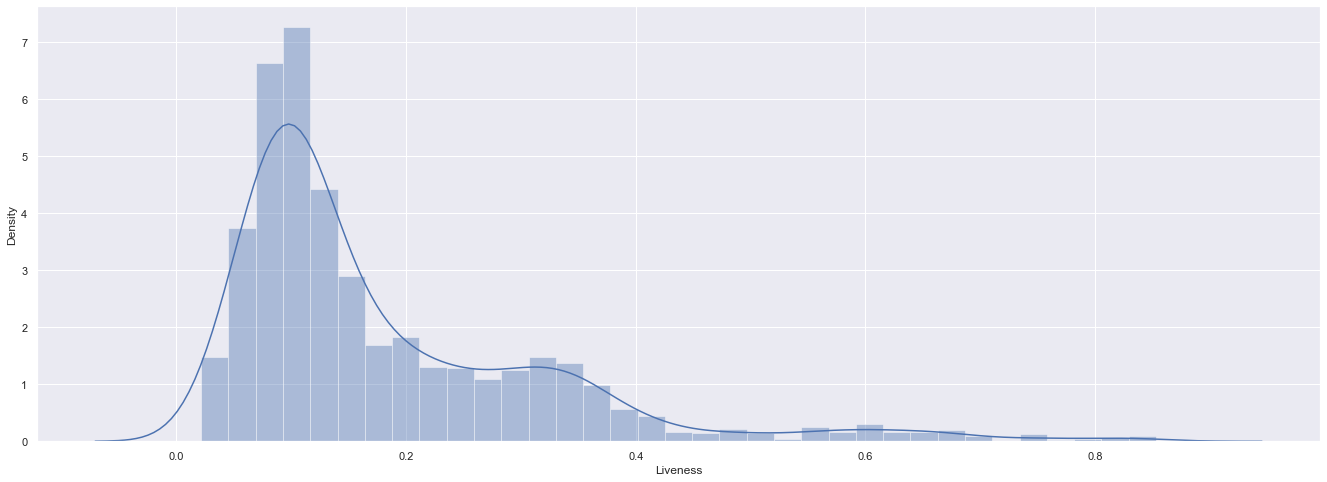

In [110]:
sns.distplot(df['liveness'])
plt.xlabel("Liveness")
plt.show()

In [111]:
# Before looking at duration, let's change the unit from miniseconds to minutes 
# Below function was written based on https://stackoverflow.com/questions/35989666/convert-milliseconds-to-hours-min-and-seconds-python
def millsectomin(millis):
    millis = int(millis)
    seconds=(millis/1000)%60
    seconds = int(seconds)
    minutes=(millis/(1000*60))%60
    minutes = int(minutes)
    return "%d:%d" % (minutes, seconds)

df['duration_m_s'] = df['duration_ms'].apply(millsectomin)

df['duration_m_s'] = df['duration_m_s'].str.replace(':','.')
pd.to_numeric(df['duration_m_s'])

0       3.31
1       2.47
2       4.10
3       3.44
4       3.20
        ... 
1995    3.10
1996    2.58
1997    3.20
1998    2.51
1999    3.35
Name: duration_m_s, Length: 2000, dtype: float64

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


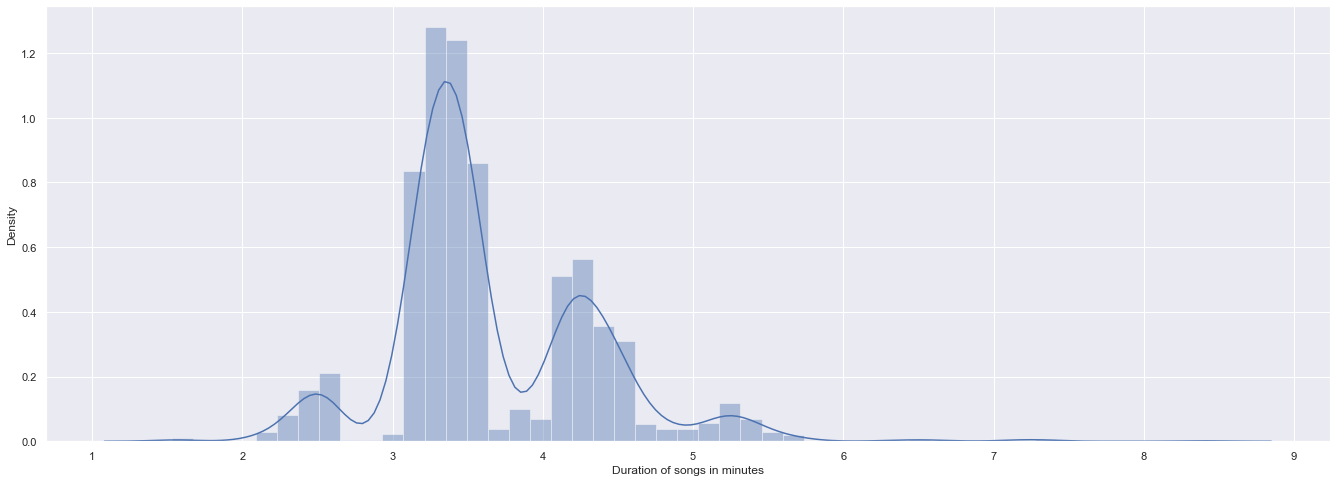

In [112]:
sns.distplot(df['duration_m_s'])
plt.xlabel("Duration of songs in minutes")
plt.show()

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


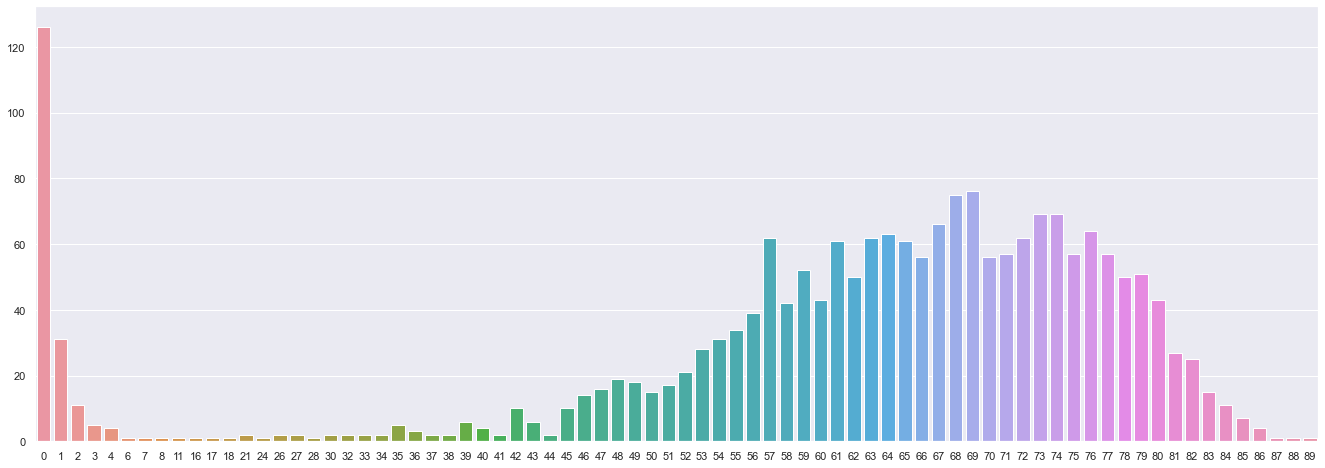

In [114]:
#Let's have a look on distrubution of popularity

df_popularity = df['popularity'].value_counts()
sns.barplot(df_popularity.index,df_popularity.values)
plt.show()

In [115]:
df['popularity'].describe()


count    2000.000000
mean       59.872500
std        21.335577
min         0.000000
25%        56.000000
50%        65.500000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64

In [118]:
# We would like to predict the popularity of track. It is a classification problem,
# but for this data it would be good idea to group this target class to four class based on popularity values.
# Let's set Platinium(top 25%),Gold(25%-50%), Silver(50%-75%),Bronze(Button 25%) label on this dataset

custom_label= ['Platinium','Gold','Silver','Bronze']

df['popularity_label'] = pd.qcut(df['popularity'],q=4,labels=custom_label)
df['popularity_label'].value_counts()

Silver       517
Platinium    504
Gold         496
Bronze       483
Name: popularity_label, dtype: int64

In [119]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,latin,country,easy listening,blues,classical,jazz,unique_genres,number_of_genre,duration_m_s,popularity_label
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,1,3.31,Bronze
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,2,2.47,Bronze
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,1,0,0,0,0,0,2,4.10,Silver
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,2,3.44,Bronze
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,1,3.20,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0,0,0,0,0,0,0,1,3.1,Bronze
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0,0,0,0,0,0,0,1,2.58,Bronze
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0,1,0,0,0,0,0,2,3.20,Silver
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0,0,0,0,0,0,0,1,2.51,Bronze


In [120]:
X =df.select_dtypes(include=np.number)
y =df['popularity_label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35, random_state=42)

lr_model = LogisticRegression(solver='liblinear',random_state=42)
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

score = lr_model.score(X_test,y_test)
score

0.7628571428571429